In [9]:
import pandas as pd
import numpy as np

In [10]:
wine_csv = pd.read_csv("/home/acer/Downloads/winequality-red.csv")

In [11]:
x_df, y_df = wine_csv.drop('quality', axis=1), wine_csv['quality'] 

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [13]:
x_df = StandardScaler().fit_transform(x_df)

In [14]:
from sklearn.decomposition import PCA

In [15]:
X_pca = PCA(n_components=2).fit(x_df).transform(x_df)

In [19]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

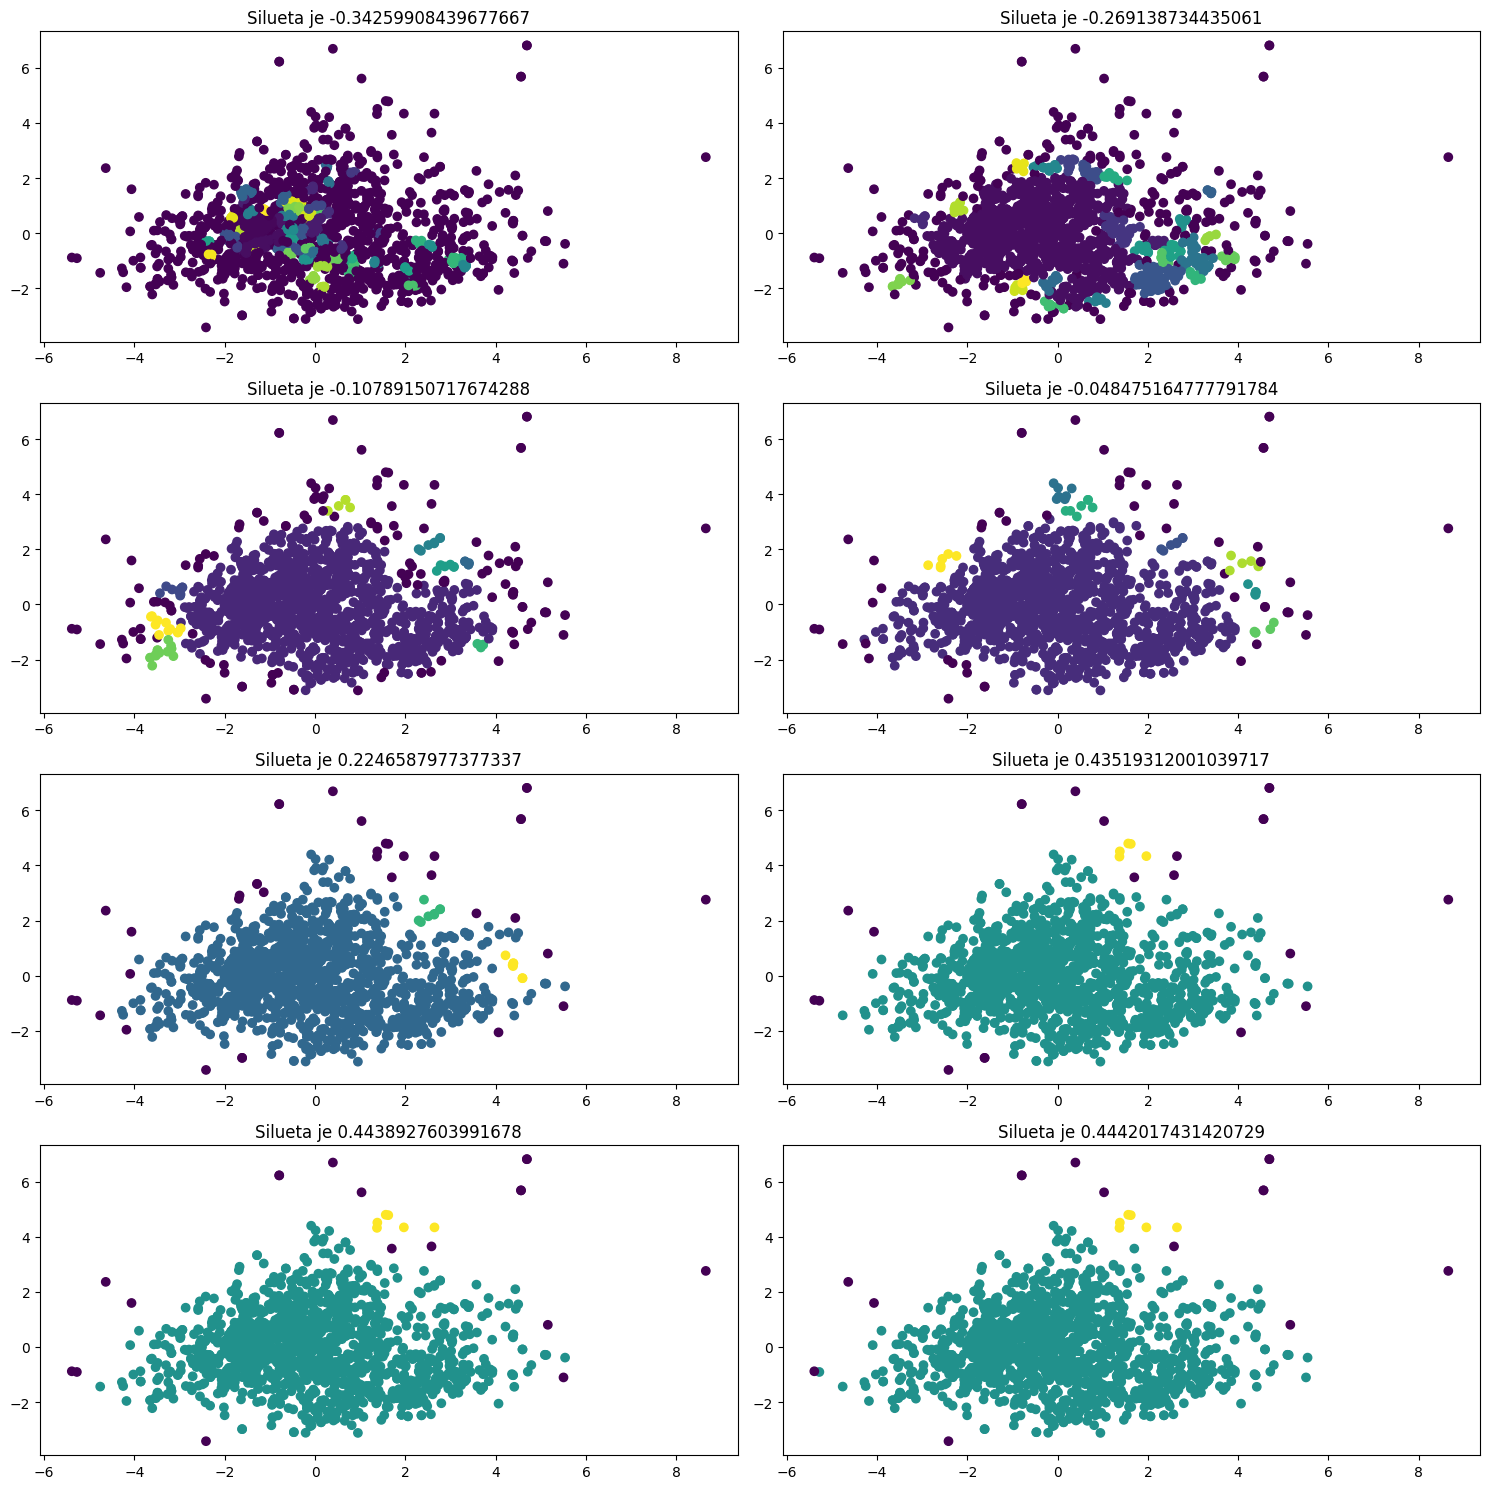

In [22]:
inertia = []
fig = plt.figure(figsize=(15,15))
for idx, k in enumerate(range(2,10)):
    dbs = DBSCAN(eps=(idx+1)/10).fit(X_pca)
    fig.add_subplot(len(range(2,10))//2,2,idx+1)
    plt.scatter(X_pca[:,0],X_pca[:,1], marker='o',c=dbs.labels_)
    plt.title(label=f'Silueta je {silhouette_score(X_pca, dbs.labels_)}')
plt.tight_layout()
    